In [ ]:
# Tempat untuk install library
#Install Library Tweepy
!pip install tweepy
#Install Library Googletrans
!pip3 install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 1.3 MB 44.7 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=bdf92f084d7592fa413c0ca9227c4437e251678c1aa0b9c67b25953d1d1abf99
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
#import library
import tweepy
import pandas as pd
import numpy as np
import string 
import re #regex library

from textblob import TextBlob

# import word_tokenize & FreqDist from NLTK
import nltk #import library nltk
from nltk.tokenize import sent_tokenize #import sent_tokenize for tokenizing paragraph into sentences
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

#word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##PROSES PENGAMBILAN DATA

In [ ]:
#Gausah dirun
#Mengisi API dari Twitter Developer
API_key= '8w1JX6MZjrI0OGKLloljvfwXu'
API_secret= 'yT2NkanLqicGid6P8oEHzMvwFC014FSzAilyGdb2BM4DOhf56E'
access_token= '397904324-1j3PA9PrrdSUV7B4g8iK5J1gMdBlsdrGZpWi8f38'
access_token_secret= 'szL2yUSgFtTzWWmXBMzSsNLpew3QgV1FMDvqmUAQYGfT3'

In [ ]:
#Gausah dirun
#Authentikasi API Twitter Developer
auth = tweepy.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#Gausah dirun
#Mencari Tweet
tweets = api.search(q='PeduliLindungi', count=100, since='2021-12-7', lang='id')

In [ ]:
#Gausah dirun
#Pengumpulan data untuk dijadikan dataframe
data = pd.DataFrame()
data['Tweet'] = [tweet.text for tweet in tweets]
display(data)

,Tweet
0,"@radenrauf Bismillah ""CBP Rupiah"" adalah Cinta..."
1,@cludyacitra @HalodocID Emang lagi error ngga ...
2,@panditfootball saatnya pedulilindungi go inte...
3,"@HalodocID halo, saya td sore swab antigen mel..."
4,Mantap PeduliLindungi terdepan https://t.co/gz...
...,...
95,Himbauan Penerapan Aplikasi PeduliLindungi yan...
96,@humaspolsekkpt @bwi24jam @Nadjib_178 @_riverh...
97,RT @humaspolsekkpt: Lawan &amp; tolak radikali...
98,@unsrifess Kemarin waktu nonton eternals idak ...


In [ ]:
# Menyimpan data ke file csv
data.to_csv('pedulilindungi.csv')

In [ ]:
# Memanggil file csv
df = pd.read_csv('pedulilindungi.csv')
df

,Unnamed: 0,Tweet
0,0,"@radenrauf Bismillah ""CBP Rupiah"" adalah Cinta..."
1,1,@cludyacitra @HalodocID Emang lagi error ngga ...
2,2,@panditfootball saatnya pedulilindungi go inte...
3,3,"@HalodocID halo, saya td sore swab antigen mel..."
4,4,Mantap PeduliLindungi terdepan https://t.co/gz...
...,...,...
95,95,Himbauan Penerapan Aplikasi PeduliLindungi yan...
96,96,@humaspolsekkpt @bwi24jam @Nadjib_178 @_riverh...
97,97,RT @humaspolsekkpt: Lawan &amp; tolak radikali...
98,98,@unsrifess Kemarin waktu nonton eternals idak ...


##PROSES CLEANSING DATA

In [ ]:
#Gausah dirun
# Emoji
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

# Membuat fungsi untuk membersihkan tweet
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) # Menghapus @mentions
    text = re.sub('#', '', text) # Menghapus '#' hashtag
    text = re.sub('RT[\s]+', '', text) # Menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) # Menghapus hyperlink
    text = re.sub(r"\d+", "", text) # Menghapus angka
    text = re.sub(r',','',text) # Menghapus koma (,)
    text = re.sub(r'_','',text)
    text = re.sub(r'\n+','',text) # Menghapus newline '/n'
    text = re.sub(r'[^\w\s]', '', text) # Menghapus punction
    text = emoji_pattern.sub(r'', text) # Menghapus emoticon
    text = text.lower() # Membuat huruf jadi kecil
    return text

# Proses membersihkan dataframe menggunakan fungsi cleanTxt
df['Clean_Tweet'] = df['Tweet'].apply(cleanTxt)

# Menampilkan 10 twit terakhir yang sudah dibersihkan dalam bentuk dataframe
data_baru = df
df

,Unnamed: 0,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity,Sentiment,Tokenize_Tweet,Text
0,0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,we can inform you that if the results of the v...,0.0,0.00,Netral,"['we', 'can', 'inform', 'you', 'that', 'if', '...","['we', 'can', 'inform', 'you', 'that', 'if', '..."
1,1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...,0.0,0.00,Netral,"['please', 'fill', 'out', 'the', 'ehac', 'form...","['please', 'fill', 'out', 'the', 'ehac', 'form..."
2,2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,cant rely on the careprotect application which...,0.8,0.35,Positive,"['cant', 'rely', 'on', 'the', 'careprotect', '...","['cant', 'rely', 'on', 'the', 'careprotect', '..."
3,3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...,0.0,0.00,Netral,"['please', 'fill', 'out', 'the', 'ehac', 'form...","['please', 'fill', 'out', 'the', 'ehac', 'form..."
4,4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,it is only mandatory to show a certificate of ...,0.7,-0.15,Negative,"['it', 'is', 'only', 'mandatory', 'to', 'show'...","['it', 'is', 'only', 'mandatory', 'to', 'show'..."
...,...,...,...,...,...,...,...,...,...
409,409,@ekstraoriginale @jorink__ Iya soalnya ini kan...,iya soalnya ini kan twitter bukan pedulilind...,yes because this is twitter i dont care about ...,0.0,0.00,Netral,"['yes', 'because', 'this', 'is', 'twitter', 'i...","['yes', 'because', 'this', 'is', 'twitter', 'i..."
410,410,RT @7lRiv3rSid3: @InSrikandi_____ @ManiseWidia...,lrivrsid luhut pendusta luhut anjing peking ...,lrivrsid luhut the liar luhut the pekingese do...,0.0,0.00,Netral,"['lrivrsid', 'luhut', 'the', 'liar', 'luhut', ...","['lrivrsid', 'luhut', 'the', 'liar', 'luhut', ..."
411,411,@humaspolsekkpt @bwi24jam @Nadjib_178 @sami86p...,jam pilang sauya,jam pilang switch,0.0,0.00,Netral,"['jam', 'pilang', 'switch']","['jam', 'pilang', 'switch']"
412,412,RT @dishub_bwi: @arieparikesit @blaworblakasut...,bwi persyaratan ppdn ke bali tetap antigen ...,bwi the requirements for ppdn to bali are stil...,0.0,0.00,Netral,"['bwi', 'the', 'requirements', 'for', 'ppdn', ...","['bwi', 'the', 'requirements', 'for', 'ppdn', ..."


In [ ]:
#Gausah dirun
# Menyimpan data ke file csv
df.to_csv('clean_tweet.csv')

In [ ]:
#Gausah dirun
#Terjemah ke bahasa Inggris
import googletrans
from googletrans import *
translator = googletrans.Translator()

df['Clean_Tweet'] = df['Clean_Tweet'].astype(str) #Ubah tipe data ke string
df['English_Tweet'] = df['Clean_Tweet'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
df

,Unnamed: 0,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity
0,0,"@radenrauf Bismillah ""CBP Rupiah"" adalah Cinta...",bismillah cbp rupiah adalah cinta bangga dann...,bismillah cbp rupiah adalah cinta bangga dann...,0.800000,0.650000
1,1,@cludyacitra @HalodocID Emang lagi error ngga ...,emang lagi error ngga sih mbak saya juga udh...,emang lagi error ngga sih mbak saya juga udh...,0.000000,0.000000
2,2,@panditfootball saatnya pedulilindungi go inte...,saatnya pedulilindungi go internasional,saatnya pedulilindungi go internasional,0.000000,0.000000
3,3,"@HalodocID halo, saya td sore swab antigen mel...",halo saya td sore swab antigen melalui halodo...,halo saya td sore swab antigen melalui halodo...,0.000000,0.000000
4,4,Mantap PeduliLindungi terdepan https://t.co/gz...,mantap pedulilindungi terdepan,mantap pedulilindungi terdepan,0.500000,0.166667
...,...,...,...,...,...,...
95,95,Himbauan Penerapan Aplikasi PeduliLindungi yan...,himbauan penerapan aplikasi pedulilindungi yan...,himbauan penerapan aplikasi pedulilindungi yan...,0.000000,0.000000
96,96,@humaspolsekkpt @bwi24jam @Nadjib_178 @_riverh...,jam riverheaven pilang sauya,jam riverheaven pilang sauya,0.000000,0.000000
97,97,RT @humaspolsekkpt: Lawan &amp; tolak radikali...,lawan amp tolak radikalismejangan lupa tetap ...,lawan amp tolak radikalismejangan lupa tetap ...,0.000000,0.000000
98,98,@unsrifess Kemarin waktu nonton eternals idak ...,kemarin waktu nonton eternals idak lagi dicek...,kemarin waktu nonton eternals idak lagi dicek...,0.066667,0.000000


In [ ]:
#Gausah dirun
#Simpan data terjemahan inggris ke file csv
df.to_csv('tweet_inggris.csv')

In [ ]:
#Memanggil file
df = pd.read_csv('tweet.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Tweet,Clean_Tweet,English_Tweet
0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,We can inform you that if the results of the v...
1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...
2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,"can't rely on the care-protect application, wh..."
3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...
4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,It is only mandatory to show a certificate of ...
...,...,...,...
409,@ekstraoriginale @jorink__ Iya soalnya ini kan...,iya soalnya ini kan twitter bukan pedulilind...,"Yes, because this is Twitter, I don't care abo..."
410,RT @7lRiv3rSid3: @InSrikandi_____ @ManiseWidia...,lrivrsid luhut pendusta luhut anjing peking ...,"lrivrsid Luhut, the liar Luhut, the Pekingese ..."
411,@humaspolsekkpt @bwi24jam @Nadjib_178 @sami86p...,jam pilang sauya,jam pilang switch
412,RT @dishub_bwi: @arieparikesit @blaworblakasut...,bwi persyaratan ppdn ke bali tetap antigen ...,bwi the requirements for ppdn to bali are stil...


In [ ]:
df['English_Tweet']=df['English_Tweet'].apply(str)

In [ ]:
# Emoji
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

# Membuat fungsi untuk membersihkan tweet
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) # Menghapus @mentions
    text = re.sub('#', '', text) # Menghapus '#' hashtag
    text = re.sub('RT[\s]+', '', text) # Menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) # Menghapus hyperlink
    text = re.sub(r"\d+", "", text) # Menghapus angka
    text = re.sub(r',','',text) # Menghapus koma (,)
    text = re.sub(r'_','',text) 
    text = re.sub(r'\n+','',text) # Menghapus newline '/n'
    text = re.sub(r'[^\w\s]', '', text) # Menghapus punction
    text = emoji_pattern.sub(r'', text) # Menghapus emoticon
    text = text.lower() # Membuat huruf jadi kecil
    return text

# Proses membersihkan dataframe menggunakan fungsi cleanTxt
df['English_Tweet'] = df['English_Tweet'].apply(cleanTxt)

# Menampilkan 10 twit terakhir yang sudah dibersihkan dalam bentuk dataframe
data_baru = df
df

,Tweet,Clean_Tweet,English_Tweet
0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,we can inform you that if the results of the v...
1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...
2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,cant rely on the careprotect application which...
3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...
4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,it is only mandatory to show a certificate of ...
...,...,...,...
409,@ekstraoriginale @jorink__ Iya soalnya ini kan...,iya soalnya ini kan twitter bukan pedulilind...,yes because this is twitter i dont care about ...
410,RT @7lRiv3rSid3: @InSrikandi_____ @ManiseWidia...,lrivrsid luhut pendusta luhut anjing peking ...,lrivrsid luhut the liar luhut the pekingese do...
411,@humaspolsekkpt @bwi24jam @Nadjib_178 @sami86p...,jam pilang sauya,jam pilang switch
412,RT @dishub_bwi: @arieparikesit @blaworblakasut...,bwi persyaratan ppdn ke bali tetap antigen ...,bwi the requirements for ppdn to bali are stil...


##PROSES LABELLING

In [ ]:
# Fungsi subjectivity dan polarity

df['English_Tweet'] = df['English_Tweet'].astype(str)

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['English_Tweet'].apply(getSubjectivity)
df['Polarity'] = df['English_Tweet'].apply(getPolarity)

df.head()

,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity
0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,we can inform you that if the results of the v...,0.0,0.00
1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...,0.0,0.00
2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,cant rely on the careprotect application which...,0.8,0.35
3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...,0.0,0.00
4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,it is only mandatory to show a certificate of ...,0.7,-0.15


In [ ]:
# Labelling
def getSentiment(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Netral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getSentiment)

df

,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity,Sentiment
0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,we can inform you that if the results of the v...,0.0,0.00,Netral
1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...,0.0,0.00,Netral
2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,cant rely on the careprotect application which...,0.8,0.35,Positive
3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...,0.0,0.00,Netral
4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,it is only mandatory to show a certificate of ...,0.7,-0.15,Negative
...,...,...,...,...,...,...
409,@ekstraoriginale @jorink__ Iya soalnya ini kan...,iya soalnya ini kan twitter bukan pedulilind...,yes because this is twitter i dont care about ...,0.0,0.00,Netral
410,RT @7lRiv3rSid3: @InSrikandi_____ @ManiseWidia...,lrivrsid luhut pendusta luhut anjing peking ...,lrivrsid luhut the liar luhut the pekingese do...,0.0,0.00,Netral
411,@humaspolsekkpt @bwi24jam @Nadjib_178 @sami86p...,jam pilang sauya,jam pilang switch,0.0,0.00,Netral
412,RT @dishub_bwi: @arieparikesit @blaworblakasut...,bwi persyaratan ppdn ke bali tetap antigen ...,bwi the requirements for ppdn to bali are stil...,0.0,0.00,Netral


In [ ]:
#Simpan data labelling ke file 
df.to_csv('labelling.csv')

##TOKENIZE TWEET

In [ ]:
# Fungsi Tokenize
def sentence_tokenization(text):
    sent_tokenize(text)

df['Tokenize_Tweet'] = df['English_Tweet'].apply(word_tokenize)
df.head(10)

,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity,Sentiment,Tokenize_Tweet
0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,we can inform you that if the results of the v...,0.000000,0.000000,Netral,"[we, can, inform, you, that, if, the, results,..."
1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...,0.000000,0.000000,Netral,"[please, fill, out, the, ehac, form, via, the,..."
2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,cant rely on the careprotect application which...,0.800000,0.350000,Positive,"[cant, rely, on, the, careprotect, application..."
3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...,0.000000,0.000000,Netral,"[please, fill, out, the, ehac, form, through, ..."
4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,it is only mandatory to show a certificate of ...,0.700000,-0.150000,Negative,"[it, is, only, mandatory, to, show, a, certifi..."
5,RT @YametKudasi99: @jgngangguduluya @nndnim Ud...,udh coba cek emailnya mbak buat nyari notif...,have you tried checking your email to look for...,0.000000,0.000000,Netral,"[have, you, tried, checking, your, email, to, ..."
6,@SHIJlN @jgngangguduluya Bukannya pedulilindun...,bukannya pedulilindungi juga bisa ya,instead of caring protect it can also yes,0.000000,0.000000,Netral,"[instead, of, caring, protect, it, can, also, ..."
7,"@sarahnoorf Hai, Kak. Sesuai keterangan Peduli...",hai kak sesuai keterangan pedulilindungi untu...,hi sis according to the information care for p...,0.433333,-0.166667,Negative,"[hi, sis, according, to, the, information, car..."
8,SUMPAH GUE SELALU LUPA CHECK OUT PEDULILINDUNG...,sumpah gue selalu lupa check out pedulilindung...,i swear i always forget to check out i care pr...,0.000000,0.000000,Netral,"[i, swear, i, always, forget, to, check, out, ..."
9,Apresiasi pd pemerintah yg membatalkan kebijak...,apresiasi pd pemerintah yg membatalkan kebijak...,appreciation to the government for canceling t...,0.000000,0.000000,Netral,"[appreciation, to, the, government, for, cance..."


##STOPWORD

In [ ]:
from nltk.corpus import stopwords

listStopword =  set(stopwords.words('english'))
listStopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Fungsi Hapus Stopwords
def remove_stopwords(word_list):
        processed_word_list = []
        for word in word_list:
            if word not in listStopword:
                processed_word_list.append(word)
        return processed_word_list

df['Stop_Tweet'] = df['Tokenize_Tweet'].apply(remove_stopwords)
df.head(10)

,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity,Sentiment,Tokenize_Tweet,Stop_Tweet
0,Dapat kami informasikan bahwa jika hasil vaksi...,dapat kami informasikan bahwa jika hasil vaksi...,we can inform you that if the results of the v...,0.000000,0.000000,Netral,"[we, can, inform, you, that, if, the, results,...","[inform, results, vaccination, results, pcr, t..."
1,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form via the careprot...,0.000000,0.000000,Netral,"[please, fill, out, the, ehac, form, via, the,...","[please, fill, ehac, form, via, careprotect, a..."
2,@drpriono1 @kemenkomarves Tidak bs mengandalka...,tidak bs mengandalkan aplikasi pedulilindung...,cant rely on the careprotect application which...,0.800000,0.350000,Positive,"[cant, rely, on, the, careprotect, application...","[cant, rely, careprotect, application, althoug..."
3,Mohon untuk mengisi formulir e-HAC melalui apl...,mohon untuk mengisi formulir ehac melalui apli...,please fill out the ehac form through the care...,0.000000,0.000000,Netral,"[please, fill, out, the, ehac, form, through, ...","[please, fill, ehac, form, careprotect, applic..."
4,@helma_saja wajib menunjukkan surat keteranga...,saja wajib menunjukkan surat keterangan hasil...,it is only mandatory to show a certificate of ...,0.700000,-0.150000,Negative,"[it, is, only, mandatory, to, show, a, certifi...","[mandatory, show, certificate, negative, rapid..."
5,RT @YametKudasi99: @jgngangguduluya @nndnim Ud...,udh coba cek emailnya mbak buat nyari notif...,have you tried checking your email to look for...,0.000000,0.000000,Netral,"[have, you, tried, checking, your, email, to, ...","[tried, checking, email, look, notifications, ..."
6,@SHIJlN @jgngangguduluya Bukannya pedulilindun...,bukannya pedulilindungi juga bisa ya,instead of caring protect it can also yes,0.000000,0.000000,Netral,"[instead, of, caring, protect, it, can, also, ...","[instead, caring, protect, also, yes]"
7,"@sarahnoorf Hai, Kak. Sesuai keterangan Peduli...",hai kak sesuai keterangan pedulilindungi untu...,hi sis according to the information care for p...,0.433333,-0.166667,Negative,"[hi, sis, according, to, the, information, car...","[hi, sis, according, information, care, protec..."
8,SUMPAH GUE SELALU LUPA CHECK OUT PEDULILINDUNG...,sumpah gue selalu lupa check out pedulilindung...,i swear i always forget to check out i care pr...,0.000000,0.000000,Netral,"[i, swear, i, always, forget, to, check, out, ...","[swear, always, forget, check, care, protect, ..."
9,Apresiasi pd pemerintah yg membatalkan kebijak...,apresiasi pd pemerintah yg membatalkan kebijak...,appreciation to the government for canceling t...,0.000000,0.000000,Netral,"[appreciation, to, the, government, for, cance...","[appreciation, government, canceling, ppkm, le..."


In [ ]:
df.sample(5)

,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity,Sentiment,Tokenize_Tweet,Stop_Tweet
110,RT @RisaHart: Yang paling penting itu sekarang...,yang paling penting itu sekarang bagaimana or...,the most important thing now is how people who...,0.777778,0.444444,Positive,"[the, most, important, thing, now, is, how, pe...","[important, thing, people, whose, vaccines, ab..."
130,Tempat wisata dibatasi maksimal 75 persen deng...,tempat wisata dibatasi maksimal persen dengan...,tourist attractions are limited to a maximum o...,0.142857,-0.071429,Negative,"[tourist, attractions, are, limited, to, a, ma...","[tourist, attractions, limited, maximum, perce..."
47,Ini sering checkin pedulilindungi gak sekalian...,ini sering checkin pedulilindungi gak sekalian...,this is often a checkin care about protecting ...,0.675000,0.256250,Positive,"[this, is, often, a, checkin, care, about, pro...","[often, checkin, care, protecting, getting, ba..."
175,monyonk pedulilindungi logout otomatis,monyonk pedulilindungi logout otomatis,monyonk caresprotect auto logout,0.000000,0.000000,Netral,"[monyonk, caresprotect, auto, logout]","[monyonk, caresprotect, auto, logout]"
406,"Jadi Big Data, Kemenkes: PeduliLindungi Bakal ...",jadi big data kemenkes pedulilindungi bakal bi...,so the big data of the ministry of health care...,0.362500,0.250000,Positive,"[so, the, big, data, of, the, ministry, of, he...","[big, data, ministry, health, cares, protect, ..."


##VISUALISASI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

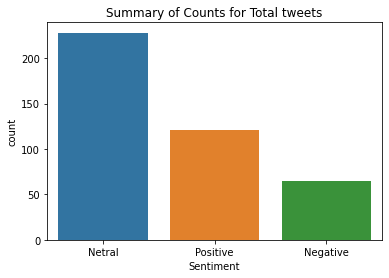

In [ ]:
#Diagram Batang dari hasil labelling
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

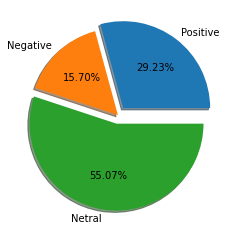

In [ ]:
# Piechart dari hasil labbeling
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Netral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Netral"],autopct='%1.2f%%');

In [ ]:
df = df.rename(columns={'Stop_Tweet': 'Text'})
df.sample(5)

Stop_Tweet        0
Tokenize_Tweet    0
Sentiment         0
Polarity          0
Subjectivity      0
English_Tweet     0
Clean_Tweet       0
Tweet             0
dtype: int64

In [ ]:
text = df.English_Tweet[0]
wordcloud = WordCloud().generate(text)

In [ ]:
df["English_Tweet"] = df["English_Tweet"].fillna(value="")
word_string_english=" ".join(df['English_Tweet'].str.lower())

(-0.5, 799.5, 799.5, -0.5)

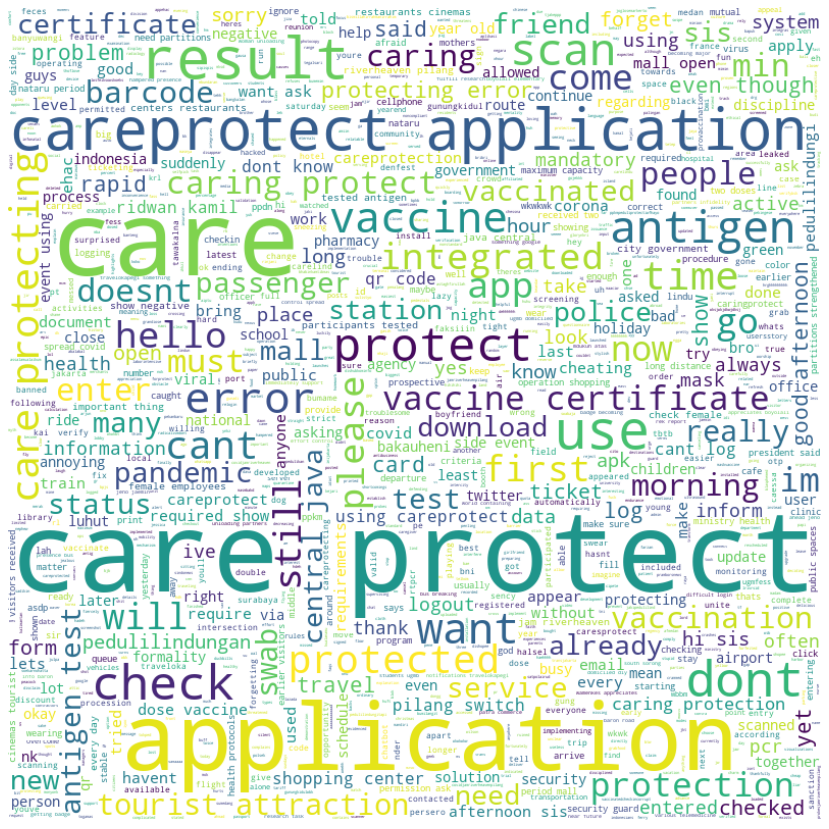

In [ ]:
#WordCloud English
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=800, height=800)
wc.generate(word_string_english)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [ ]:
df["Clean_tweet"] = df["Clean_Tweet"].fillna(value="")
word_string_indo=" ".join(df['Clean_Tweet'].str.lower())

(-0.5, 799.5, 799.5, -0.5)

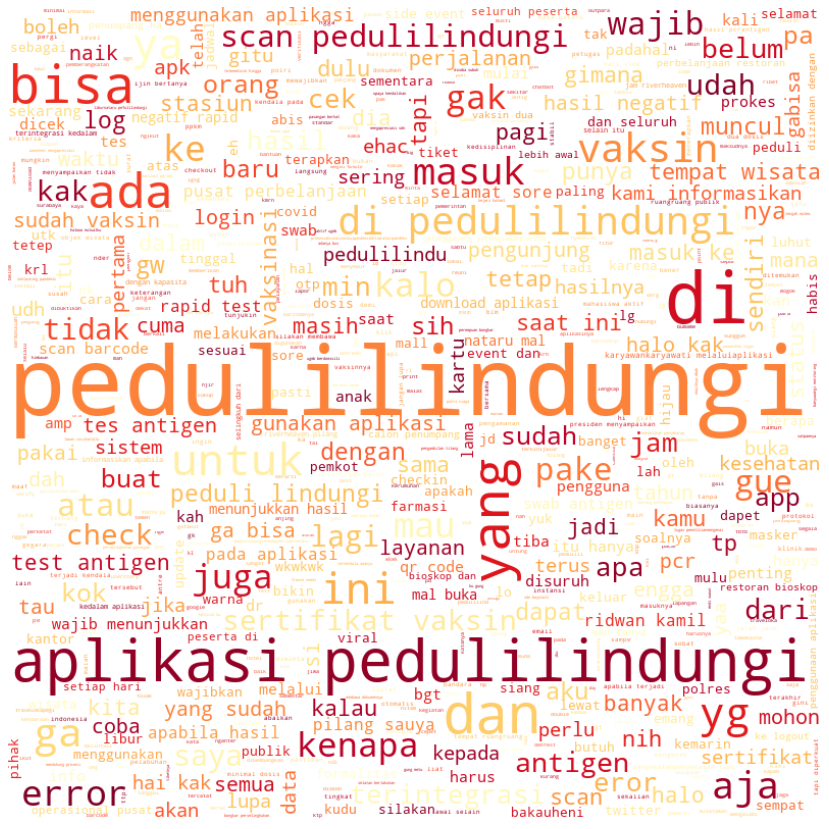

In [ ]:
#WordCloud Indo
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=800, height=800)
wc.generate(word_string_indo)

plt.imshow(wc.recolor( colormap= 'YlOrRd' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [ ]:
df = df.rename(columns={'Stop_Tweet': 'Text'})
df.sample(5)

,Tweet,Clean_Tweet,English_Tweet,Subjectivity,Polarity,Sentiment,Tokenize_Tweet,Text,Clean_tweet
340,@twiceminato Halo kak. Kami informasikan apabi...,halo kak kami informasikan apabila hasil pcra...,hello sis we will inform you that the results ...,0.0,0.0,Netral,"[hello, sis, we, will, inform, you, that, the,...","[hello, sis, inform, results, antigen, integra...",halo kak kami informasikan apabila hasil pcra...
199,"@KAI121 Halo, saya ingin tahu kenapa saya terc...",halo saya ingin tahu kenapa saya tercatat seb...,hello i want to know why i am registered as a ...,0.0,0.0,Netral,"[hello, i, want, to, know, why, i, am, registe...","[hello, want, know, registered, passenger, vac...",halo saya ingin tahu kenapa saya tercatat seb...
380,@SriwijayaAir Utk hasil antigen apakah hrus te...,utk hasil antigen apakah hrus tercatat di apl...,for the results of the antigen should it be re...,0.0,0.0,Netral,"[for, the, results, of, the, antigen, should, ...","[results, antigen, recorded, careprotect, appl...",utk hasil antigen apakah hrus tercatat di apl...
298,@nonaaisyaa Selamat sore Kak. Saat ini calon p...,selamat sore kak saat ini calon penumpang ka ...,good afternoon sis at this time prospective in...,0.6,0.7,Positive,"[good, afternoon, sis, at, this, time, prospec...","[good, afternoon, sis, time, prospective, inte...",selamat sore kak saat ini calon penumpang ka ...
257,Polres Sorong Selatan Berlakukan Sistem Scan B...,polres sorong selatan berlakukan sistem scan b...,south sorong police apply barcode qr scan syst...,0.0,0.0,Netral,"[south, sorong, police, apply, barcode, qr, sc...","[south, sorong, police, apply, barcode, qr, sc...",polres sorong selatan berlakukan sistem scan b...


In [ ]:
df.to_csv('klasifikasi.csv')

##KLASIFIKASI

In [ ]:
# Memisahkan data test dan train
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y =train_test_split(df['Text'], df['Sentiment'], test_size = 0.10, random_state = 50)
# random_state = 50 menyatakan adanya pengacakan pada data yang di split

In [ ]:
df_train= pd.DataFrame()
df_train['Text'] = train_X
df_train['Sentiment'] = train_Y

df_test = pd.DataFrame()
df_test['Text'] = test_X
df_test['Sentiment'] = test_Y

In [ ]:
len(df_train)

372

In [ ]:
len(df_test)

42

In [ ]:
df_train.sample(10)

,Text,Sentiment
400,"[percentage, terms, vaccination, rate, us, alr...",Netral
347,"[finally, rescheduled, nowwww, antigen, come, ...",Netral
50,"[care, protecting, cant, scan, barcode, time, ...",Netral
181,"[im, sorry, chat, ministry, health, time, want...",Negative
303,"[transjakarta, must, scan, care, protect, min,...",Netral
217,"[cares, protecting, error, person, wants, go, ...",Positive
106,"[try, morning, bro, middle, night, tried]",Netral
265,"[thank, god, near, future, care, protect, tawa...",Positive
13,"[onu, seems, care, protecting, jw, much]",Positive
281,"[thought, force, logging, couldnt, log, app, c...",Netral


In [ ]:
df_test.sample(10)

,Text,Sentiment
88,"[unite, covid, always, use, care, protect, app...",Netral
311,[nan],Netral
231,"[young, people, using, twitter, leaked, gap, c...",Positive
349,"[yes, cant, go, scan, protect, old, video, use...",Positive
196,"[really, stupid, care, protecting, using, erro...",Negative
329,"[guys, want, ask, example, already, antigen, d...",Netral
204,"[check, caessa, bro, news, careprotect, system...",Netral
1,"[please, fill, ehac, form, via, careprotect, a...",Netral
31,"[hi, sis, last, departure, istora, mandiri, st...",Netral
188,"[cares, morning]",Netral


In [ ]:
df_train.to_csv(r"data_train.csv")
df_test.to_csv(r"data_test.csv")

## BOW+SVM

In [ ]:
#Word Vectorization (Count Vectorizer)
from sklearn.feature_extraction.text import CountVectorizer
BoW_vect = CountVectorizer(preprocessor=' '.join,
                             max_features = 5000,
                              lowercase=False)
BoW_vect.fit(df['Text'])
train_X_BoW = BoW_vect.transform(df_train['Text'])
test_X_BoW = BoW_vect.transform(df_test['Text'])

In [ ]:
# Proses Pelatihan SVM & Count Vectorizer
from sklearn.svm import SVC
model_BOW = SVC(kernel='linear')
model_BOW.fit(train_X_BoW,train_Y)

SVC(kernel='linear')

In [ ]:
# Proses Pengujian SVM & Count Vectorizer

from sklearn.metrics import accuracy_score

predictions_SVM_BOW = model_BOW.predict(test_X_BoW)
test_prediction_BOW = pd.DataFrame()
test_prediction_BOW['Text'] = test_X
test_prediction_BOW['Sentiment'] = predictions_SVM_BOW
SVM_accuracy_BOW= accuracy_score(predictions_SVM_BOW, test_Y)*100
SVM_accuracy_BOW= round(SVM_accuracy_BOW,1)

In [ ]:
result_svm_BOW = test_prediction_BOW
result_svm_BOW.head(5)

,Text,Sentiment
150,"[care, protect, longer, download, still, dont,...",Netral
269,"[reunion, blasphemed, considered, interfere, p...",Netral
89,"[banyuwangi, police, monitoring, active, secur...",Negative
403,"[yesterday, watched, eternals, longer, checked...",Negative
115,"[every, public, service, agency, medan, city, ...",Netral


In [ ]:
SVM_accuracy_BOW  

76.2

In [ ]:
data = [line.strip() for line in df]
texts = [[word.lower() for word in text.split()] for text in data]
data

['Tweet',
 'Clean_Tweet',
 'English_Tweet',
 'Subjectivity',
 'Polarity',
 'Sentiment',
 'Tokenize_Tweet',
 'Text',
 'Clean_tweet']

## TF-IDF+SVM

In [ ]:
# Word Vectorization (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(preprocessor=' '.join,
                             max_features = 5000,
                            lowercase=False)
tfidf_vect.fit(df['Text'])
train_X_tfidf = tfidf_vect.transform(df_train['Text'])
test_X_tfidf = tfidf_vect.transform(df_test['Text'])

In [ ]:
tfidf_vect

TfidfVectorizer(lowercase=False, max_features=5000,
                preprocessor=<built-in method join of str object at 0x7f522cf4ce30>)

In [ ]:
print(train_X_tfidf)

  (0, 1224)	0.4276355554215474
  (0, 1180)	0.22887932911004447
  (0, 1177)	0.31899489136926557
  (0, 1099)	0.326106962172075
  (0, 879)	0.15413099589451756
  (0, 645)	0.4276355554215474
  (0, 425)	0.3340575808998583
  (0, 351)	0.3012847158507652
  (0, 310)	0.24047960637816926
  (0, 177)	0.2657722534873641
  (0, 152)	0.1384838677356613
  (1, 1202)	0.21385696255129688
  (1, 1069)	0.28071410064250185
  (1, 1027)	0.28071410064250185
  (1, 1015)	0.22333281260215246
  (1, 948)	0.3073742324379652
  (1, 885)	0.3363499202979854
  (1, 480)	0.2680566739394536
  (1, 390)	0.2347155059594225
  (1, 292)	0.35934921763952504
  (1, 165)	0.20207898364547866
  (1, 142)	0.3363499202979854
  (1, 13)	0.35934921763952504
  (2, 1202)	0.5596602676361108
  (2, 1132)	0.36731216702175123
  :	:
  (369, 879)	0.13833798451472182
  (369, 443)	0.3838179368174364
  (369, 425)	0.299828416635786
  (369, 398)	0.3838179368174364
  (369, 294)	0.3838179368174364
  (369, 186)	0.43552482282142685
  (369, 165)	0.2158388964541356

In [ ]:
print(test_X_tfidf)

  (0, 1044)	0.3871452603282296
  (0, 879)	0.21921304288265905
  (0, 639)	0.5692785739951997
  (0, 315)	0.45369096848590024
  (0, 310)	0.34202248522068823
  (0, 152)	0.3939177822126019
  (1, 944)	0.32885100300514114
  (1, 919)	0.35133753129828943
  (1, 894)	0.26792350069156207
  (1, 662)	0.2818610476937752
  (1, 546)	0.35133753129828943
  (1, 544)	0.35133753129828943
  (1, 274)	0.35133753129828943
  (1, 231)	0.35133753129828943
  (1, 112)	0.35133753129828943
  (2, 1179)	0.31324059911682733
  (2, 984)	0.3473139899749212
  (2, 849)	0.3316535676413478
  (2, 715)	0.4161495007876811
  (2, 247)	0.4446054198456364
  (2, 94)	0.4161495007876811
  (2, 8)	0.3566853475202067
  (3, 1241)	0.2630871934184321
  (3, 1205)	0.5908176546010742
  (3, 1108)	0.1880386836349094
  :	:
  (38, 403)	0.40767132022998165
  (38, 384)	0.46477084228684024
  (38, 329)	0.4463889019320968
  (38, 158)	0.25190836606529454
  (38, 56)	0.20647761660139646
  (39, 962)	0.6200531636865235
  (39, 685)	0.55221114445083
  (39, 345)	

In [ ]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect.vocabulary_)

{'inform': 528, 'results': 943, 'vaccination': 1179, 'pcr': 814, 'test': 1086, 'affiliated': 15, 'carelindu': 157, 'application': 56, 'please': 846, 'fill': 384, 'ehac': 329, 'form': 403, 'via': 1190, 'careprotect': 158, 'cant': 149, 'rely': 929, 'although': 33, 'good': 438, 'field': 382, 'convenience': 240, 'regarding': 920, 'flight': 392, 'information': 529, 'mandatory': 662, 'show': 1005, 'certificate': 177, 'negative': 743, 'rapid': 908, 'antigen': 41, 'result': 942, 'still': 1044, 'valid': 1182, 'tried': 1137, 'checking': 189, 'email': 332, 'look': 640, 'notifications': 758, 'travelokapegi': 1135, 'something': 1024, 'else': 331, 'google': 439, 'maps': 666, 'instead': 535, 'caring': 165, 'protect': 879, 'also': 32, 'yes': 1240, 'hi': 480, 'sis': 1015, 'according': 6, 'care': 152, 'protection': 882, 'black': 111, 'code': 218, 'scanner': 972, 'passenger': 809, 'indicated': 522, 'swear': 1066, 'always': 34, 'forget': 401, 'check': 186, 'aaaaaaaaaaaa': 0, 'appreciation': 60, 'governmen

In [ ]:
# Proses Pelatihan SVM & TF-IDF
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(train_X_tfidf,train_Y)

SVC(kernel='linear')

In [ ]:
# Proses Pengujian SVM & TF-IDF
from sklearn.metrics import accuracy_score
predictions_SVM_TFIDF= model.predict(test_X_tfidf)
test_prediction= pd.DataFrame()
test_prediction['Text'] = test_X
test_prediction['Sentiment'] = predictions_SVM_TFIDF
SVM_accuracy_TFIDF= accuracy_score(predictions_SVM_TFIDF, test_Y)*100
SVM_accuracy_TFIDF= round(SVM_accuracy_TFIDF,1)

In [ ]:
result_svm = test_prediction
result_svm.head(5)

,Text,Sentiment
150,"[care, protect, longer, download, still, dont,...",Netral
269,"[reunion, blasphemed, considered, interfere, p...",Netral
89,"[banyuwangi, police, monitoring, active, secur...",Negative
403,"[yesterday, watched, eternals, longer, checked...",Netral
115,"[every, public, service, agency, medan, city, ...",Netral


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Result Sentimen Using SVM')

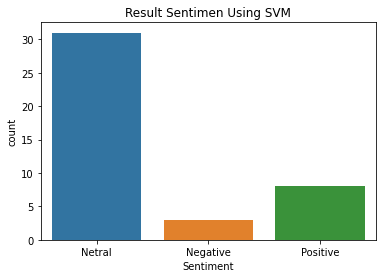

In [ ]:
# Visualisasi Hasil SVM
sns.countplot(result_svm['Sentiment'])
plt.title("Result Sentimen Using SVM")

In [ ]:
test_prediction.to_csv(r"test_prediction.csv")

In [ ]:
#SVM Accuracy
SVM_accuracy

78.6

CLASSIFICATION REPORT

In [ ]:
print ("\nAccuracy using SVM + TF-IDF:") 
SVM_accuracy_TFIDF


Accuracy using SVM + TF-IDF:


78.6

In [ ]:
print ("\nAccuracy using SVM + BOW:") 
SVM_accuracy_BOW


Accuracy using SVM + BOW:


76.2

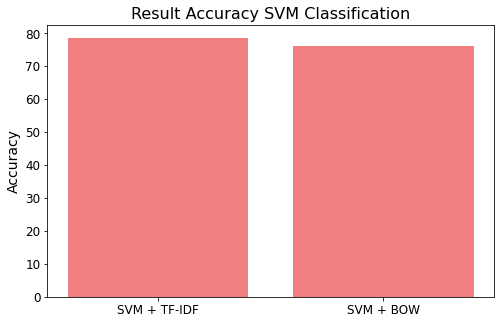

In [ ]:
model = ['SVM + TF-IDF', 'SVM + BOW']
accuracy = [SVM_accuracy_TFIDF, SVM_accuracy_BOW]

plt.figure(figsize=(8,5))
plt.bar(model, accuracy, color='lightcoral')

plt.title('Result Accuracy SVM Classification', size=16)
plt.ylabel('Accuracy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [ ]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import classification_report
print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_TFIDF))


Here is the classification report:
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         6
      Netral       0.81      0.96      0.88        26
    Positive       0.62      0.50      0.56        10

    accuracy                           0.79        42
   macro avg       0.81      0.65      0.70        42
weighted avg       0.79      0.79      0.77        42



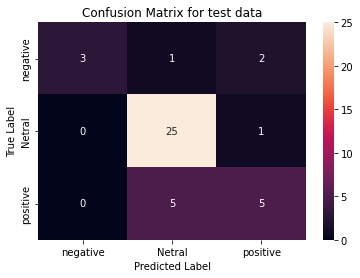

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(test_Y, predictions_SVM_TFIDF)
class_label = ["negative","Netral", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns =
class_label)
sns.heatmap(test, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()